In [37]:
# part 1
# lines = [x.split(' ') for x in open('inputs/input_09_test.txt','r').read().splitlines()]
lines = [x.split(' ') for x in open('inputs/input_09.txt','r').read().splitlines()]

M = {'U':(0,1),'D':(0,-1),'L':(-1,0),'R':(1,0)}

def move(pos,dir):
    return [pos[0] + M[dir][0], pos[1] + M[dir][1]]

T = [0,0]
H = [0,0]

visited = set([(0,0)])
for line in lines:
    dir = line[0]
    for i in range(int(line[1])):
        H = move(H,dir)
        if abs(H[0]-T[0]) > 1 or abs(H[1]-T[1]) > 1:  # need to move the tail
            T = move(T,dir)
            if dir in ['U','D']:
                T[0] = H[0]
            if dir in ['L','R']:
                T[1] = H[1]
            visited.add(tuple(T))
        # print(line,H,T)
# print(visited)
print(len(visited))


6337


Number of visited positions: 2455


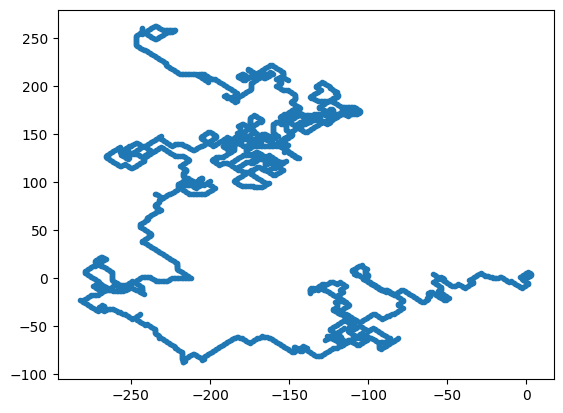

In [ ]:
# part 2 continued
import matplotlib.pyplot as plt

# lines = [x.split(' ') for x in open('inputs/input_09_test2.txt','r').read().splitlines()]
lines = [x.split(' ') for x in open('inputs/input_09.txt','r').read().splitlines()]
KNOTS = 10
rope = [[0,0] for _ in range(KNOTS)]

tail_map = {
            (0,2):('U'),
            (0,-2):('D'),
            (-2,0):('L'),
            (2,0):('R'),

            (1,2):('U','R'),
            (-1,2):('U','L'),
            (-1,-2):('D','L'),
            (1,-2):('D','R'),

            (2,1):('U','R'),
            (-2,1):('U','L'),
            (-2,-1):('D','L'),
            (2,-1):('D','R'),

            (2,2):('U','R'),
            (-2,2):('U','L'),
            (-2,-2):('D','L'),
            (2,-2):('D','R'),
}

visited = set([(0,0)])
for line in lines:
    headdir = line[0]
    for i in range(int(line[1])):
        rope[0] = move(rope[0],headdir)
        for r in range(1,KNOTS):
            dL = (rope[r-1][0]-rope[r][0], rope[r-1][1]-rope[r][1])
            if dL in tail_map:
                for eachmove in tail_map[dL]:
                    rope[r] = move(rope[r],eachmove)

        # print(line,rope)
        visited.add(tuple(rope[-1]))

x = [x[0] for x in visited]
y = [y[1] for y in visited]

plt.plot(x,y,'.')

# print(visited)
print(f'Number of visited positions: {len(visited)}')
# 2486 is too high
